## AML Milestone

## 1) Import required libraries

In [1]:
# Pandas helps to load data
import pandas as pd 
# Numpy helps perform computational operations
import numpy as np
# Matplotlib and Seaborn is used for data visualization
import matplotlib.pyplot as plt 
import seaborn as sns
# To enable plots appear within Jupyter Notebook
%matplotlib inline

import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from nltk.stem import *
import nltk.corpus
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

## 2) Load the Dataset

In [2]:
#Load Dataset
df = pd.read_csv("DOHMH_New_York_City_Restaurant_Inspection_Results (1).csv")
df

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,RECORD DATE,INSPECTION TYPE,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,50048586,BILL'S NEW YORK CITY,Manhattan,57,EAST 54 STREET,10022.0,2125182727,American,11/20/2017,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.760097,-73.973129,105.0,4.0,10200.0,1035765.0,1.012900e+09,MN17
1,50071467,TGA NYC,Manhattan,320,WEST 36 STREET,10018.0,2126514842,American,10/17/2018,Violations were cited in the following area(s).,...,03/23/2022,Smoke-Free Air Act / Initial Inspection,40.753817,-73.993362,104.0,3.0,11100.0,1090332.0,1.007590e+09,MN13
2,41617347,DUNKIN,Bronx,1090,MORRIS PARK AVENUE,10461.0,7189750433,Donuts,08/09/2019,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.849397,-73.853349,211.0,13.0,25400.0,2094972.0,2.041080e+09,BX37
3,41617347,DUNKIN,Bronx,1090,MORRIS PARK AVENUE,10461.0,7189750433,Donuts,08/09/2019,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.849397,-73.853349,211.0,13.0,25400.0,2094972.0,2.041080e+09,BX37
4,41663033,EL ENCANTO CENTRO-AMERICANO RESTAURANT,Queens,14912,JAMAICA AVENUE,11435.0,7182629799,Latin American,10/27/2021,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.701927,-73.805260,412.0,27.0,21200.0,4213989.0,4.099970e+09,QN61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329115,50093803,COFFEE MONSTER,Queens,15708,NORTHERN BLVD,11354.0,9179080334,Coffee/Tea,12/03/2019,Violations were cited in the following area(s).,...,03/23/2022,Pre-permit (Operational) / Initial Inspection,40.763722,-73.808049,407.0,20.0,117100.0,4119352.0,4.052760e+09,QN51
329116,41648461,TROPIC POLLO,Queens,9059,CORONA AVENUE,11373.0,7185921868,Latin American,03/07/2019,No violations were recorded at the time of thi...,...,03/23/2022,Administrative Miscellaneous / Initial Inspection,40.742442,-73.873697,404.0,25.0,47100.0,4039574.0,4.015860e+09,QN29
329117,41272136,GOLDEN KRUST CARIBBEAN BAKERY & GRILL,Brooklyn,872,UTICA AVENUE,11203.0,7182825027,Caribbean,07/12/2019,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Re-inspection,40.652110,-73.930435,317.0,41.0,86800.0,3102091.0,3.046750e+09,BK96
329118,41350902,SPA CASTLE CAFE,Queens,11-11,131 STREET,11356.0,7189396300,Asian/Asian Fusion,03/16/2022,Violations were cited in the following area(s).,...,03/23/2022,Cycle Inspection / Initial Inspection,40.787493,-73.837351,407.0,19.0,94500.0,4097283.0,4.040110e+09,QN49


## 3) Cleaning the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329120 entries, 0 to 329119
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   CAMIS                  329120 non-null  int64  
 1   DBA                    327829 non-null  object 
 2   BORO                   329120 non-null  object 
 3   BUILDING               328537 non-null  object 
 4   STREET                 329108 non-null  object 
 5   ZIPCODE                324134 non-null  float64
 6   PHONE                  329092 non-null  object 
 7   CUISINE DESCRIPTION    325162 non-null  object 
 8   INSPECTION DATE        329120 non-null  object 
 9   ACTION                 325163 non-null  object 
 10  VIOLATION CODE         321466 non-null  object 
 11  VIOLATION DESCRIPTION  323448 non-null  object 
 12  CRITICAL FLAG          329120 non-null  object 
 13  SCORE                  313863 non-null  float64
 14  GRADE                  166354 non-nu

### Removing Duplicate data

In [4]:
# Change the inspection date column to datetime format:
df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])

# Add a column that counts how many data entries have the same id (CAMIS) (and therefore represent the same restaurant):
df['#_of_inspections'] = df.groupby('CAMIS')['CAMIS'].transform('count')

# Sort values by name (DBA), id (CAMIS), and inspection date:
df_sorted = df.sort_values(by=['DBA', 'CAMIS','INSPECTION DATE'])

# Drop duplicate values:
df_filtered = df_sorted.drop_duplicates(subset=['DBA', 'CAMIS'], keep='last', inplace=False).copy()

# Double check no duplicates remain:
df_filtered['count_check'] = df_filtered.groupby('CAMIS')['CAMIS'].transform('count')
print('# of Restaurants in NYC: ', len(df_filtered))
print('# of duplicates: ', len(df_filtered[df_filtered['count_check'] > 1]))
df_filtered.reset_index(inplace=True, drop = True)
df_filtered.head()

# of Restaurants in NYC:  28727
# of duplicates:  0


,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,...,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA,#_of_inspections,count_check
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,9172508950,Chinese,2019-12-16,Violations were cited in the following area(s).,...,40.660156,-73.980555,307.0,39.0,16900.0,3026939.0,3.011100e+09,BK40,29,1
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,7186532222,Latin American,2022-03-17,Violations were cited in the following area(s).,...,40.891176,-73.858591,212.0,12.0,42200.0,2063603.0,2.048430e+09,BX44,15,1
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,9175878888,Pizza,2022-02-22,Violations were cited in the following area(s).,...,40.746510,-73.990158,105.0,3.0,7600.0,1015746.0,1.008300e+09,MN17,12,1
3,50105915,$1 PIZZA SLICE,Manhattan,748,9 AVENUE,10019.0,5513581106,NaN,1900-01-01,NaN,...,40.763714,-73.988766,104.0,3.0,13300.0,1025172.0,1.010410e+09,MN15,1,1
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,3479930599,Pizza,2021-11-18,Violations were cited in the following area(s).,...,40.881253,-73.882900,207.0,11.0,42100.0,2017769.0,2.033270e+09,BX43,3,1


### Remove Unnecessary Columns

In [5]:
# Remove columns that we will not be working with:
df_filtered.drop(columns = ['VIOLATION DESCRIPTION','VIOLATION CODE', 'RECORD DATE', 
                                   'Community Board', 'Council District', 'Census Tract','BIN','BBL','NTA',
                                   'count_check'], inplace = True, axis=1)

### Changing Phone Number format

In [6]:
# Update format of telephone numbers:
df_filtered['PHONE']=df_filtered['PHONE'].astype(str).apply(
    lambda x: '('+x[:3]+')'+' '+x[3:6]+'-'+x[6:10])

# Rename telephone number column to match the name in the df_filtered dataset:
df_filtered.rename(columns={'PHONE':'display_phone'}, inplace=True)

### Handling Missing Data

In [7]:
df_filtered.isnull().sum()

CAMIS                     0
DBA                    1240
BORO                      0
BUILDING                101
STREET                   12
ZIPCODE                 468
display_phone             0
CUISINE DESCRIPTION    3958
INSPECTION DATE           0
ACTION                 3957
CRITICAL FLAG             0
SCORE                  4553
GRADE                  7433
GRADE DATE             8422
INSPECTION TYPE        3957
Latitude                 81
Longitude                81
#_of_inspections          0
dtype: int64

In [8]:
# Replace null values in ACTION column with 'Not Yet Inspected' as per guidence from dataset creators
df_filtered['ACTION'].fillna(value='Not Yet Inspected', inplace=True)

# Replace null values in CRITICAL FLAG column with 'Not Applicable' as per guidence from dataset creators
df_filtered['CRITICAL FLAG'].fillna(value='Not Applicable', inplace=True)

# Replace null values in INSPECTION TYPE column with 'Unknown' as per guidence from dataset creators
df_filtered['INSPECTION TYPE'].fillna(value='Unknown', inplace=True)

In [9]:
# Use details from Action column to determine grade status for rows with null values:
df_filtered['GRADE'].fillna(df_filtered['ACTION'], inplace=True)
df_filtered['GRADE'].replace({'Violations were cited in the following area(s).':'Z',
                                     'No violations were recorded at the time of this inspection.': 'A',
                                     'Not Yet Inspected':'N',
                                     'Establishment Closed by DOHMH. Violations were cited in the following area(s) and those requiring immediate action were addressed.':'P',
                                     'Establishment re-opened by DOHMH.': 'P','Establishment re-closed by DOHMH': 'P'}, inplace = True)

# Ensure GRADE column has only the grade letter scores and not any text from the Action column:
df_filtered['GRADE'].value_counts()

A    18535
N     4950
Z     4061
B      887
C      218
P       76
Name: GRADE, dtype: int64

In [10]:
# Use details from GRADE column to determine the SCORE for rows with null values:
df_filtered['SCORE'].fillna(df_filtered['GRADE'], inplace=True)
df_filtered['SCORE'].replace({'N':'PEND',
                                     'Z': 'PEND',
                                     'P':'PEND',
                                     'A': 8,
                                     'B': 21,
                                     'C': 35}, inplace = True)

In [11]:
# Replace null values in grade date column with 'TBD' as the restaurants with no grade date do not yet have a grade.
df_filtered['GRADE DATE'].fillna(value='TBD', inplace=True)

# Drop all other rows with NaN values:
df_filtered.dropna(inplace=True)

# Double check we do not have any more null values:
df_filtered.isnull().sum()

CAMIS                  0
DBA                    0
BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
display_phone          0
CUISINE DESCRIPTION    0
INSPECTION DATE        0
ACTION                 0
CRITICAL FLAG          0
SCORE                  0
GRADE                  0
GRADE DATE             0
INSPECTION TYPE        0
Latitude               0
Longitude              0
#_of_inspections       0
dtype: int64

### Handling Outliers

In [12]:
# Check For Outliers:
df_filtered.describe()

,CAMIS,ZIPCODE,Latitude,Longitude,#_of_inspections
count,2.427900e+04,24279.000000,24279.000000,24279.000000,24279.000000
mean,4.710586e+07,10670.524115,40.729517,-73.943762,13.160138
std,4.191804e+06,594.033711,0.068357,0.075284,10.523260
min,3.007544e+07,10000.000000,40.499563,-74.248708,1.000000
25%,4.156782e+07,10022.000000,40.690223,-73.989193,5.000000
50%,5.004572e+07,10467.000000,40.735760,-73.959633,10.000000
75%,5.008627e+07,11226.000000,40.762756,-73.904043,18.000000
max,5.012003e+07,12345.000000,40.912822,-73.700928,99.000000


In [13]:
# Convert outliers in number of inspections column to have a value of '70'
df_filtered['#_of_inspections'] = np.where(df_filtered['#_of_inspections'].between(
    70,98), 70, df_filtered['#_of_inspections'])

## 4) Visualizing the Data

In [14]:
df_cpy=df_filtered

In [15]:
df_cpy

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,display_phone,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,CRITICAL FLAG,SCORE,GRADE,GRADE DATE,INSPECTION TYPE,Latitude,Longitude,#_of_inspections
0,50075009,#1 GARDEN CHINESE RESTAURANT,Brooklyn,221,PROSPECT PARK WEST,11215.0,(917) 250-8950,Chinese,2019-12-16,Violations were cited in the following area(s).,Not Critical,10.0,A,12/16/2019,Cycle Inspection / Re-inspection,40.660156,-73.980555,29
1,41336841,#1 SABOR LATINO RESTAURANT,Bronx,4120,WHITE PLAINS ROAD,10466.0,(718) 653-2222,Latin American,2022-03-17,Violations were cited in the following area(s).,Not Critical,40.0,Z,TBD,Cycle Inspection / Initial Inspection,40.891176,-73.858591,15
2,50086385,$1 PIZZA,Manhattan,832,6 AVENUE,10001.0,(917) 587-8888,Pizza,2022-02-22,Violations were cited in the following area(s).,Critical,7.0,B,02/22/2022,Cycle Inspection / Re-inspection,40.746510,-73.990158,12
4,50106018,$1 SLICE PIZZA,Bronx,3414,JEROME AVENUE,10467.0,(347) 993-0599,Pizza,2021-11-18,Violations were cited in the following area(s).,Not Critical,11.0,A,11/18/2021,Pre-permit (Operational) / Initial Inspection,40.881253,-73.882900,3
5,41319107,& MORE BY SHERATON,Queens,13520,39 AVENUE,11354.0,(718) 460-6666,American,2022-01-27,Violations were cited in the following area(s).,Not Critical,12.0,A,01/27/2022,Cycle Inspection / Re-inspection,40.759839,-73.831798,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27476,50103228,kokomo restaurant,Brooklyn,65,KENT AVENUE,11249.0,(347) 743-9839,Caribbean,2022-01-12,Violations were cited in the following area(s).,Not Critical,19.0,N,TBD,Pre-permit (Operational) / Initial Inspection,40.722050,-73.959840,5
27478,50007379,matchpointnyc,Brooklyn,2781,SHELL ROAD,11223.0,(718) 769-0001,Soups/Salads/Sandwiches,2022-03-04,Violations were cited in the following area(s).,Not Critical,12.0,A,03/04/2022,Cycle Inspection / Re-inspection,40.584497,-73.974514,10
27480,50107134,red bamboo,Manhattan,140,WEST 4 STREET,10012.0,(212) 260-1212,Chinese,2021-11-09,Violations were cited in the following area(s).,Not Critical,10.0,A,11/09/2021,Pre-permit (Operational) / Initial Inspection,40.731373,-74.000314,2
27483,50008073,tutto il giorno,Manhattan,114,FRANKLIN STREET,10013.0,(212) 274-8100,Italian,2020-02-05,Violations were cited in the following area(s).,Critical,5.0,A,02/05/2020,Cycle Inspection / Re-inspection,40.718626,-74.006082,11


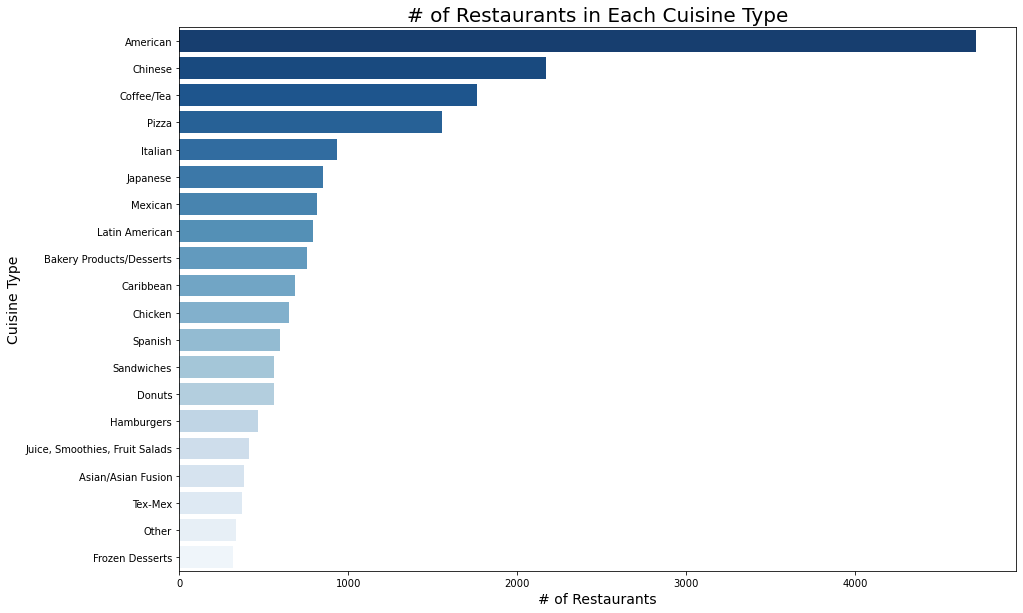

In [16]:
# Replace the long description for Latin restuarants with 'Latin'
df_cpy['CUISINE DESCRIPTION'].replace(
    {'Latin (Cuban, Dominican, Puerto Rican, South & Central American)':'Latin'},inplace=True)

# Create a list of the 20 most frequent cuisine types:
cuisine_type = df_cpy['CUISINE DESCRIPTION'].value_counts()[:20].index.tolist()

# Create a temporary dataframe including only restaurants that are in the 20 most popular cuisine types:
df_cpy_cuis = df_cpy.loc[df_cpy['CUISINE DESCRIPTION'].isin(cuisine_type)].copy()

# Create a horizontal bar chart comparing the # of each grade inspections in each cuisine type:
plt.figure(figsize=(15,10))
sns.countplot(data=df_cpy_cuis, y='CUISINE DESCRIPTION', 
              order = df_cpy_cuis['CUISINE DESCRIPTION'].value_counts().index,palette='Blues_r')
# Add chart title and labels
plt.title('# of Restaurants in Each Cuisine Type', fontsize=20)
plt.xlabel('# of Restaurants', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14);

### 4.1) Borough

While not all restaurants have an inspection grade yet (some are still pending or not graded yet), let's see how many restaurants in each borough have been given an inspection grade.

In [17]:
# Create a temporary dataframe that includes only the restaurants that have been given an inspection grade:
df_filtered_temp = df_filtered.loc[df_filtered['GRADE'].isin(['A','B','C'])].copy()

# List in descending order the number of inspected restaurants in each borough:
print('# Of Restaurants Per Borough:','\n',
      df_filtered_temp['GRADE'].groupby(df_filtered_temp['BORO']).count().sort_values(ascending=False))

# Of Restaurants Per Borough: 
 BORO
Manhattan        7640
Brooklyn         4778
Queens           4344
Bronx            1769
Staten Island     685
Name: GRADE, dtype: int64


It looks like Manhattan has the most graded restaurants, followed by Brooklyn, Queens, the Bronx, and finally Staten Island

Let's now take a look at which grades the graded restaurants earned by each borough.

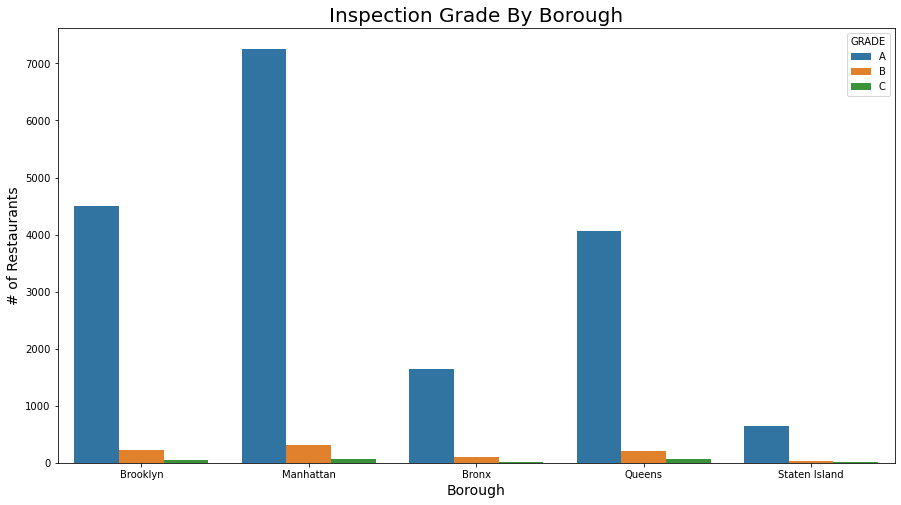

In [18]:
# Create a bar chart comparing the # of each grade inspections in each borough:
plt.figure(figsize=(15,8))
sns.countplot(data=df_filtered_temp, x='BORO',hue='GRADE')

# Add chart title and labels
plt.title('Inspection Grade By Borough', fontsize=20)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('# of Restaurants', fontsize=14);

It looks like the majority of restaurants have an 'A' inspection grade, and a 'C' grade is given to the least number of restaurants in each borough.

Many of the restaurants have had multiple inspections recorded. Let's see if certain boroughs are more likely to have many inspections.

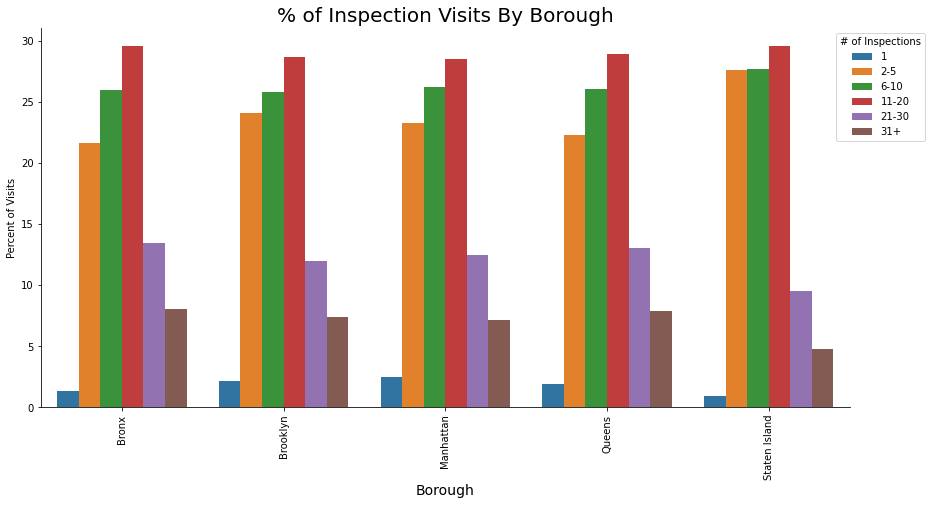

In [19]:
# Define a function that will create ranges representing the value in the count column:
def count_range(x):
    '''This function will replace a numerical value with a corresponding range label.'''
    if x == 1:
        return '1'
    elif 2<=x<=5:
        return '2-5'
    elif 6<=x<=10:
        return '6-10'
    elif 11<=x<=20:
        return '11-20'
    elif 21<=x<=30:
        return '21-30'
    else:
        return '31+'

# Add a new column that gives a range of the number of visits based on the '#_of_inspections' column:
df_filtered['count_range'] = df_filtered['#_of_inspections'].apply(lambda x: count_range(x))

# Create a bar chart comparing the % of inspection visits for each borough:
x,y = 'BORO', 'count_range'
(df_filtered.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar',
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title, labels, and legend
plt.title('% of Inspection Visits By Borough', fontsize=20)
plt.legend(loc='upper right', title = '# of Inspections', bbox_to_anchor=(1.1, 1))
plt.xlabel('Borough', fontsize=14)
plt.xticks(rotation='vertical');

We see a similar trend across all boroughs, with 11-20 visits being most common, followed by 6-10 visits. Having only 1 visit is typically the least common. This is not too surprising as restaurants can expect to get an inspection at least once a year and therefore even restaurants with an A grading and no violations will likely have as many inspections as years they have been in business.

In [20]:
print('# Of Restaurants Per Borough:','\n',
      df_filtered['GRADE'].groupby(df_filtered['BORO']).count().sort_values(ascending=False))

# Of Restaurants Per Borough: 
 BORO
Manhattan        9575
Brooklyn         6101
Queens           5451
Bronx            2286
Staten Island     866
Name: GRADE, dtype: int64


### 4.2) Cuisine Type

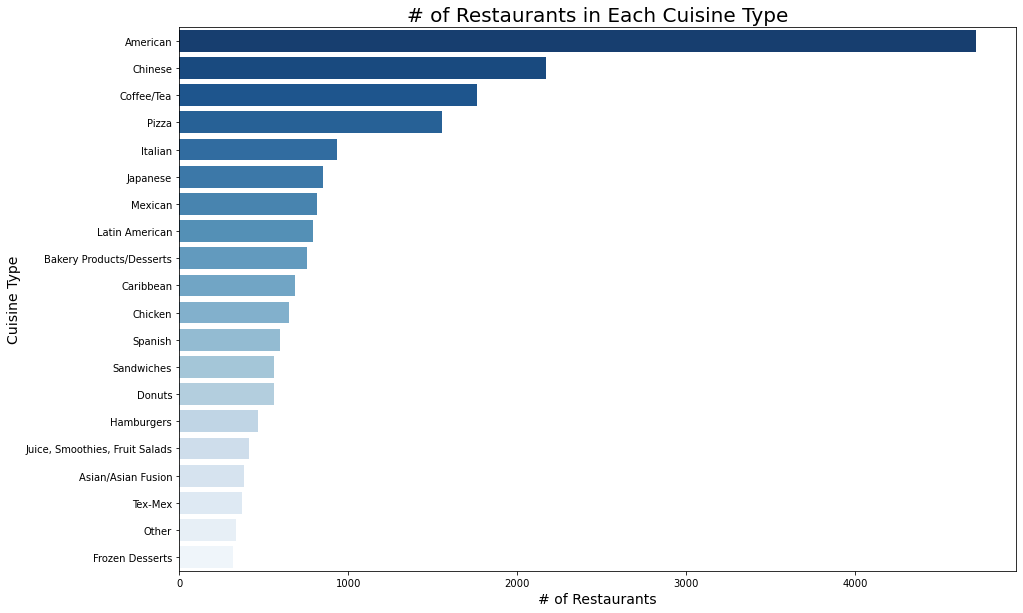

In [21]:
# Replace the long description for Latin restuarants with 'Latin'
df_filtered['CUISINE DESCRIPTION'].replace(
    {'Latin (Cuban, Dominican, Puerto Rican, South & Central American)':'Latin'},inplace=True)

# Create a list of the 20 most frequent cuisine types:
cuisine_type = df_filtered['CUISINE DESCRIPTION'].value_counts()[:20].index.tolist()

# Create a temporary dataframe including only restaurants that are in the 20 most popular cuisine types:
df_filtered_cuis = df_filtered.loc[df_filtered['CUISINE DESCRIPTION'].isin(cuisine_type)].copy()

# Create a horizontal bar chart comparing the # of each grade inspections in each cuisine type:
plt.figure(figsize=(15,10))
sns.countplot(data=df_filtered_cuis, y='CUISINE DESCRIPTION', 
              order = df_filtered_cuis['CUISINE DESCRIPTION'].value_counts().index,palette='Blues_r')
# Add chart title and labels
plt.title('# of Restaurants in Each Cuisine Type', fontsize=20)
plt.xlabel('# of Restaurants', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14);

The top 5 most popular cuisines are American, Chinese, Coffee/Tea, Pizza and Italian

Let's now see how inspection grades vary by cuisine.

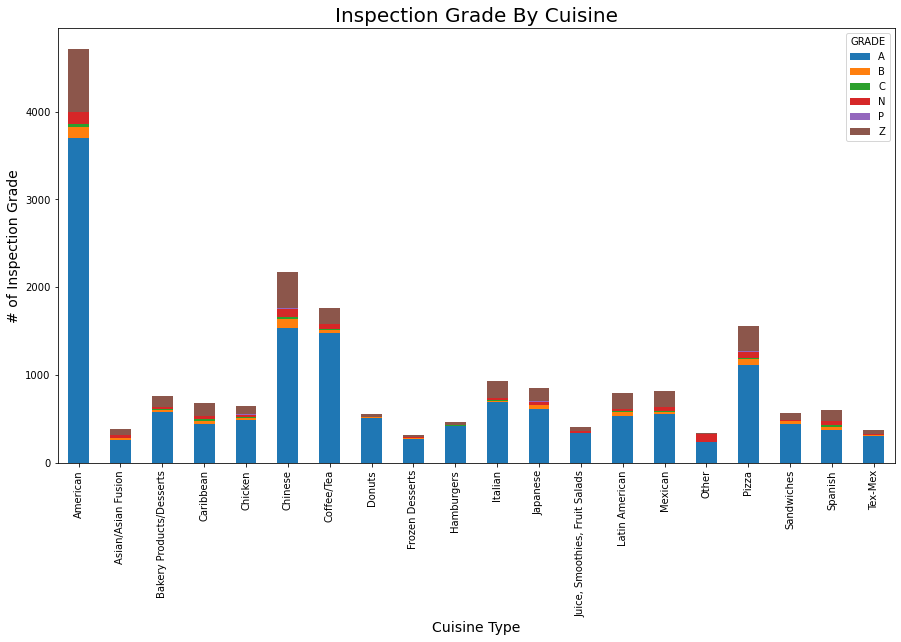

In [22]:
# Create a stacked bar chart comparing the # of each grade inspections in each cuisine type:
df_plot = df_filtered_cuis.groupby(['GRADE', 'CUISINE DESCRIPTION']).size().reset_index().pivot(columns='GRADE', index='CUISINE DESCRIPTION', values=0)
df_plot.plot(kind='bar', stacked=True,figsize=(15,8))

# Add chart title and labels
plt.title('Inspection Grade By Cuisine', fontsize=20)
plt.ylabel('# of Inspection Grade', fontsize=14)
plt.xlabel('Cuisine Type', fontsize=14);

Overall, most restaurants appear to primarily consist of 'A' grades. In particular, there are a lot of 'A' grades for our most populous cuisine types: American, Coffee/Tea, Chinese, and Pizza. We also see a good amount of restaurants with pending grades ('Z') in these same categories.

Let's see if any particular cuisines have a greater amount of inspection visits than others.

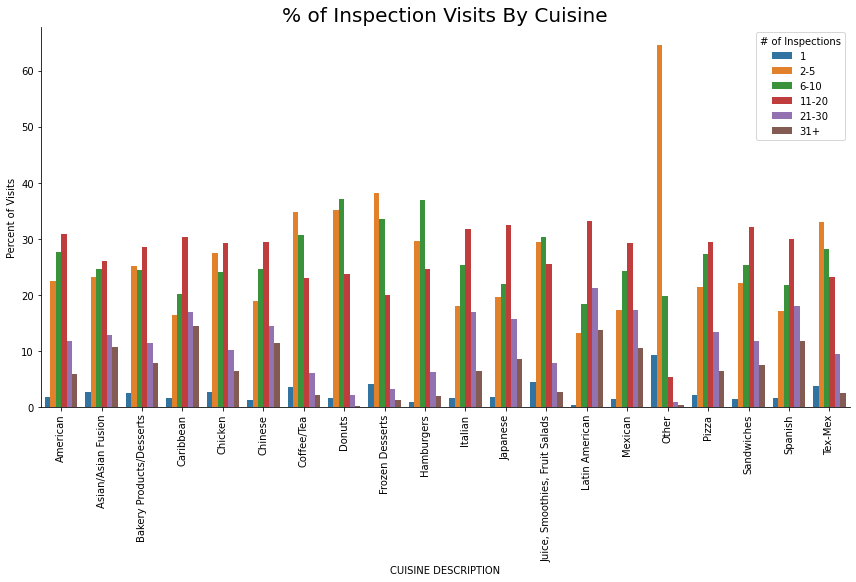

In [23]:
# Add a new column that gives a range of the number of visits based on the '#_of_inspections' column:
df_filtered_cuis['count_range'] = df_filtered_cuis['#_of_inspections'].apply(lambda x: count_range(x))

# Create a bar chart comparing the % of inspection visits for each cuisine:
x,y = 'CUISINE DESCRIPTION', 'count_range'
(df_filtered_cuis.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar',
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title and legend
plt.title('% of Inspection Visits By Cuisine', fontsize=20)
plt.legend(loc='upper right', title='# of Inspections')
plt.xticks(rotation='vertical');

It looks like 'Coffee/Tea', 'Juice, Smoothies, Fruit Salads', and 'Other' have more restaurants with fewer inspection visits, indicating they either have fewer violations or they consist of a lot of newer restaurants and therefore have not had as many visits yet. Latin American, Chinese, and Thai seem to have the greatest number of inspection visits.

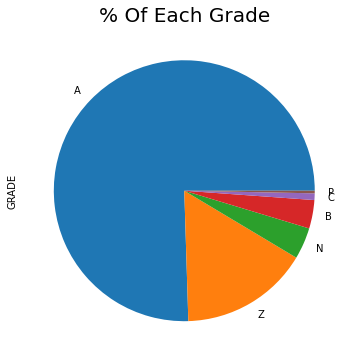

In [24]:
# Plot a pie chart that shows the breakout of each grade:
plt.figure(figsize=(12,6))
df_filtered_cuis['GRADE'].value_counts().plot(kind='pie')
plt.title('% Of Each Grade', fontsize=20);

The vast majority of our restaurants appear to have 'A' grades.

Now let's see if certain grades (including pending grades) are likely to have more or less inspection visits.

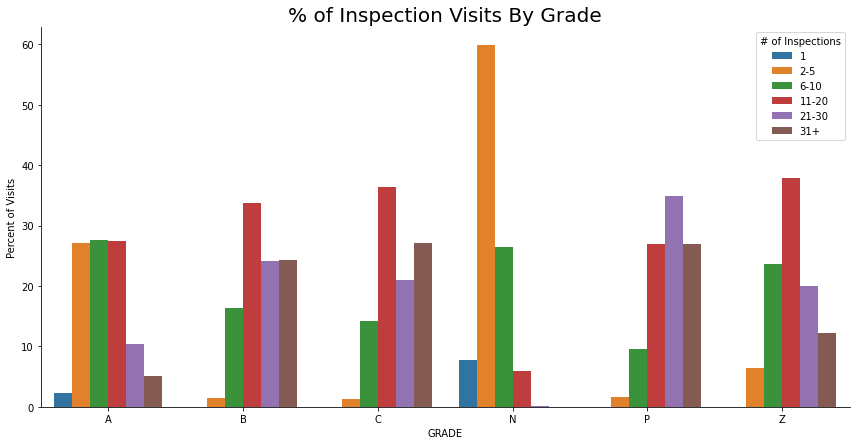

In [25]:
# Create a bar chart comparing the % of inspection visits for each grade:
x,y = 'GRADE', 'count_range'
(df_filtered_cuis.groupby(x)[y]
                     .value_counts(normalize=True)
                     .rename('Percent of Visits')
                     .mul(100)
                     .reset_index()
                     .pipe((sns.catplot,'data'), x=x,y='Percent of Visits',hue=y,kind='bar', 
                           hue_order = ['1','2-5','6-10','11-20','21-30','31+'],height=6, aspect=2, legend=False))

# Add chart title and legend:
plt.title('% of Inspection Visits By Grade', fontsize=20)
plt.legend(loc='upper right', title='# of Inspections');

Those restaurants that are not yet graded (N) are most likely to only have 2-5 visits, likely because they are new restaurants. We also see that restaurants with a 'B' or 'C' grade are likely to have more inspection visits than restaurants with an 'A' grade, likely because these restaurants have violations (leading to their 'B' or 'C' grades) and therefore needed extra inspections.

## 5) Classification Algorithms

Many of our data columns are currently filled with categorical data, which our model will be unable to read. Therefore, we have to update the data to be numerical. We will use one-hot encoding to turn each category within a column into its own column with numerical data that our model is able to properly use.

#### One Hot Encoding of Categorical data

In [29]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop CAMIS and DBA columns
    df = df.drop(['CAMIS', 'DBA'], axis=1)
    
    # Drop columns with more than 25% missing values
    missing_value_columns = df.columns[df.isna().mean() >= 0.25]
    df = df.drop(missing_value_columns, axis=1)
    
    # Drop high-cardinality columns
    high_cardinality_columns = [
        'BUILDING',
        'STREET',
        'display_phone'
    ]
    df = df.drop(high_cardinality_columns, axis=1)
    
    # Convert ZIPCODE column into a string column
    df['ZIPCODE'] = df['ZIPCODE'].astype(str)
    
    # Extract date features
    df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
    df['INSPECTION YEAR'] = df['INSPECTION DATE'].apply(lambda x: x.year)
    df['INSPECTION MONTH'] = df['INSPECTION DATE'].apply(lambda x: x.month)
    df['INSPECTION DAY'] = df['INSPECTION DATE'].apply(lambda x: x.day)
    df = df.drop('INSPECTION DATE', axis=1)
    
    # One-hot encode remaining categorical columns
    for column in df.select_dtypes('object').columns.drop('CRITICAL FLAG'):
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    
    # Split df into X and y
    y = df['CRITICAL FLAG']
    X = df.drop('CRITICAL FLAG', axis=1)
    
    # Train-test split
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_rem = pd.DataFrame(scaler.transform(X_rem), index=X_rem.index, columns=X_rem.columns)
    
    return X_train, X_rem, y_train, y_rem


In [30]:
def preprocess_inputs_rf(df):
    df = df.copy()
    
    # Drop CAMIS and DBA columns
    df = df.drop(['CAMIS', 'DBA'], axis=1)
    
    # Drop columns with more than 25% missing values
    missing_value_columns = df.columns[df.isna().mean() >= 0.25]
    df = df.drop(missing_value_columns, axis=1)
    
    # Drop high-cardinality columns
    high_cardinality_columns = [
        'BUILDING',
        'STREET',
        'display_phone'
    ]
    df = df.drop(high_cardinality_columns, axis=1)
    
    # Convert ZIPCODE column into a string column
    df['ZIPCODE'] = df['ZIPCODE'].astype(str)
    
    # Extract date features
    df['INSPECTION DATE'] = pd.to_datetime(df['INSPECTION DATE'])
    df['INSPECTION YEAR'] = df['INSPECTION DATE'].apply(lambda x: x.year)
    df['INSPECTION MONTH'] = df['INSPECTION DATE'].apply(lambda x: x.month)
    df['INSPECTION DAY'] = df['INSPECTION DATE'].apply(lambda x: x.day)
    df = df.drop('INSPECTION DATE', axis=1)
    
    # Split df into X and y
    y = df['CRITICAL FLAG']
    X = df.drop('CRITICAL FLAG', axis=1)
    
    # Train-test split
    X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_rem = pd.DataFrame(scaler.transform(X_rem), index=X_rem.index, columns=X_rem.columns)
    
    return X_train, X_rem, y_train, y_rem


#### Divide dataset into train (80%), dev(10%) and test(10%)

In [31]:
X_train, X_rem, y_train, y_rem = preprocess_inputs(df_filtered_cuis)

In [32]:
# Splitting remaining data into development and test dataset
X_dev, X_test, y_dev, y_test = train_test_split(X_rem, y_rem, train_size=0.5, shuffle=True, random_state=1)

In [33]:
print(X_train.shape), print(y_train.shape)
print(X_dev.shape), print(y_dev.shape)
print(X_test.shape), print(y_test.shape)

(15752, 956)
(15752,)
(1969, 956)
(1969,)
(1970, 956)
(1970,)


(None, None)

## Comparing Models

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import itertools

In [35]:
# Define Confusion Matrix:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''This function will create a confusion matrix chart which shows the accuracy breakdown of the given model.
    Inputs:
        cm: confusion matrix function for tested and predicted y values
        classes: variables to identify for each class (0 or 1)
        normalize: if True will normalize the data, if False will not normalize the data
        title: title of the chart
        cmap: colors to plot
    Returns:
        A graph that represents the confusion matrix
    '''
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add title and labels:
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add axis scales and tick marks:
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add labels to each cell:
    thresh = cm.max() / 2.
    # Iterate through confusion matrix and append labels to the plot:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    # Add legend:
    plt.colorbar()
    plt.show()
    
# Use High Rating and Low Rating  for 0 and 1 classes 
class_names = ['Critical','Not Applicable','Non-Critical']


### 1) Logistic Regression

In [36]:
from sklearn.metrics import balanced_accuracy_score

Logistic Regression Train Accuracy:  79.37742835418318 %
Logistic Regession Dev Accuracy:  71.59572195861159 %
                precision    recall  f1-score   support

      Critical       0.64      0.73      0.68      1020
Not Applicable       1.00      0.87      0.93        23
  Not Critical       0.65      0.55      0.59       926

      accuracy                           0.65      1969
     macro avg       0.76      0.72      0.74      1969
  weighted avg       0.65      0.65      0.64      1969



/Users/aashikaperunkolam/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


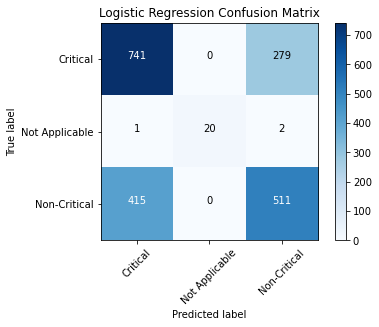

In [37]:
# Create the classifier, fit it on the training data and make predictions on the test set:
logr = LogisticRegression()

logr.fit(X_train, y_train)
y_pred_dev_logr = logr.predict(X_dev)
y_pred_train_logr = logr.predict(X_train)

# Check the Accuracy:
print('Logistic Regression Train Accuracy: ', balanced_accuracy_score(y_train, y_pred_train_logr)*100,'%')
print('Logistic Regession Dev Accuracy: ', balanced_accuracy_score(y_dev, y_pred_dev_logr)*100,'%')

# Print classification report:
print(classification_report(y_dev, y_pred_dev_logr))

# Confusion Matrix for LogReg:
cm_logr = confusion_matrix(y_dev,y_pred_dev_logr)
confusion_matrix_plot(cm_logr, classes=class_names, title='Logistic Regression Confusion Matrix')

In [38]:
y_dev.value_counts()

Critical          1020
Not Critical       926
Not Applicable      23
Name: CRITICAL FLAG, dtype: int64

### 2) Random Forest

Random Forest Train Accuracy:  98.70816846227822 %
Random Forest Dev Accuracy:  67.25735393853913 %
                precision    recall  f1-score   support

      Critical       0.64      0.73      0.68      1020
Not Applicable       0.89      0.74      0.81        23
  Not Critical       0.65      0.54      0.59       926

      accuracy                           0.64      1969
     macro avg       0.73      0.67      0.69      1969
  weighted avg       0.65      0.64      0.64      1969



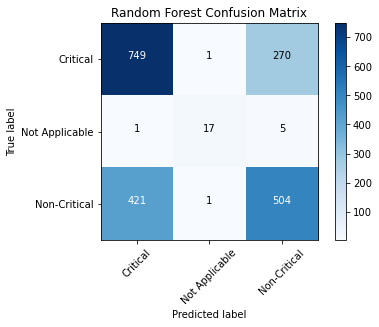

In [40]:
# Create the classifier, fit it on the training data and make predictions on the test set:
from sklearn.metrics import balanced_accuracy_score
rforest = RandomForestClassifier(n_estimators=120, criterion = 'entropy', max_depth=None, max_features=10, 
                                 min_samples_split=8, random_state=123)
rforest.fit(X_train, y_train)
y_pred_dev_rf = rforest.predict(X_dev)
y_pred_train_rf = rforest.predict(X_train)

# Check the Accuracy:
print('Random Forest Train Accuracy: ', balanced_accuracy_score(y_train, y_pred_train_rf)*100,'%')
print('Random Forest Dev Accuracy: ', balanced_accuracy_score(y_dev, y_pred_dev_rf)*100,'%')

# Print classification report:
print(classification_report(y_dev, y_pred_dev_rf))

# Confusion Matrix for Random Forest:
cm_forest = confusion_matrix(y_dev,y_pred_dev_rf)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

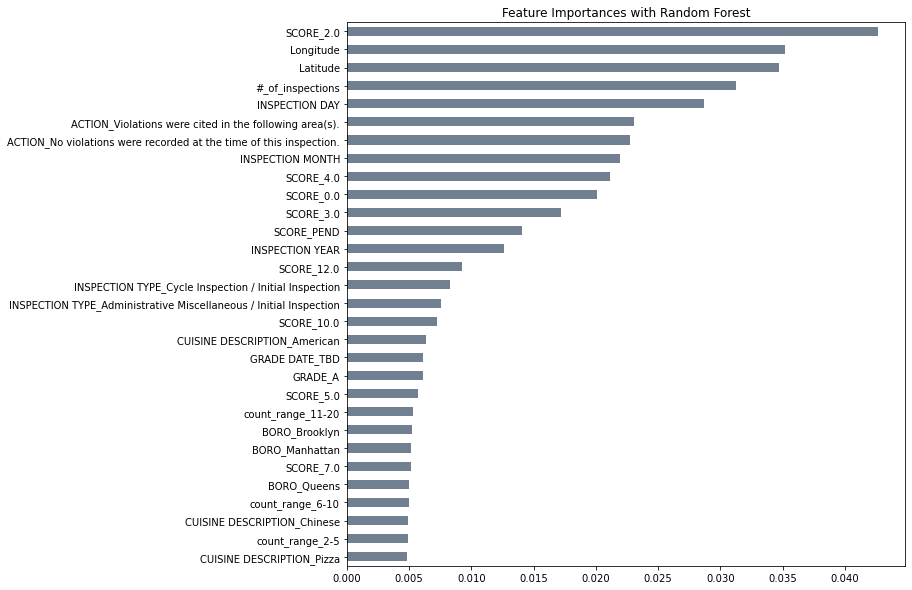

In [41]:
# Plot the 30 most influential features based on XGBoost model:
influential_features = pd.Series(rforest.feature_importances_, index=X_train.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='slategrey', figsize=(10,10))
plt.title('Feature Importances with Random Forest');